🌻🌻🌻🌻**Este colab es para hacer el EDA, pero con las tablas ya juntas y separadas únicamente por REAL y FAKE** 🌻🌻🌻🌻

## Algunas preguntas:

Patrones en el contenido textual:

1. ¿Las noticias FAKE tienden a tener títulos más largos o más cortos que las REAL? (longitud del título/texto)
2. ¿Existen ciertos autores que publican más noticias FAKE que otros?


Comportamiento temporal:

1. ¿En qué momentos del día se publican más noticias falsas vs reales? (columna 'tiempo' y 'hora')
2. ¿Hay diferencias en la duración de lectura de las noticias reales vs falsas? (columna 'duracion')
3. ¿Las noticias FAKE suelen compartirse más rápido o más veces que las reales? (relación entre 'compartir' y 'tiempo')


Engagement y métricas de interacción:


1. ¿Las noticias FAKE tienen más o menos visitas que las reales?
2. ¿Se guardan más las noticias reales como favoritas o las falsas?
3. ¿Hay una relación entre el número de visitas y la cantidad de veces que se comparte una noticia?
4. ¿Ciertas fuentes publican más noticias falsas que otras?


Correlaciones y relaciones entre variables:

1. ¿Existe una correlación entre la cantidad de veces que una noticia es compartida y su veracidad?
2. ¿Hay una relación entre el tiempo de lectura y si una noticia es falsa o real?
3. ¿Ciertas categorías de noticias (género/tipo) tienen más probabilidades de ser FAKE?

Patrones geográficos:
1. ¿En qué países hay más noticias falsas?

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [ ]:
df_real = pd.read_csv('df_real.csv')
df_fake = pd.read_csv('df_fake.csv')

In [ ]:
df_fake.sample(10)

,ID,Autor,autor_codificado,compartir_tiempo,fecha_compartir,hora_compartir,titulo,texto,tematica,Fuente,...,duracion,favorito,tiempo,tipo,pais,idioma,Valores,Valores_codificados,fecha_tiempo,hora_tiempo
2132,8825,Desconocido,9,340,2022-10-02,05:00:00,Anonymous World War 3 Has Begun!,source Add To The Conversation Using Facebook ...,Tecnología,Global Insight,...,3.0,3020.0,402,Reportaje especial,Bangladesh,English,FAKE,0,2022-09-18,01:00:00
1073,7072,Alexander Lee,0,480,2022-10-26,11:00:00,Will Hillary Select Her Own Prosecutors?,"By Bill Sardi November 1, 2016 Journalist Carl...",Política,National Courier,...,274.0,9204.0,844,Noticia de última hora,Iran,English,FAKE,0,2022-10-06,11:00:00
2817,9953,Michael Sharma,24,438,2022-10-14,21:00:00,Exclusive: Siege of Islamabad,"By Brig Asif H. Raja on October 31, 2016 \nAsi...",Política,The Insight,...,441.0,1514.0,608,Noticia de última hora,Colombia,English,FAKE,0,2022-09-26,15:00:00
69,5396,Desconocido,9,454,2022-10-02,14:00:00,BREAKING: AP Finds Proof Melania Trump Illegal...,\nIn what may be the last bombshell to drop ...,Política,The Observer,...,343.0,4471.0,297,Columna de humor,Myanmar,English,FAKE,0,2022-09-13,16:00:00
2498,9428,Desconocido,9,45,2022-09-10,04:00:00,Public vs. Media on War,Email \nA new poll from an unlikely source sug...,Política,The Insight,...,511.0,NaN,168,Carta al editor,Argentina,English,FAKE,0,2022-09-08,07:00:00
1464,7717,Daniel Patel,8,848,2022-10-11,04:00:00,Christie Lost Republicans The 2012 Election. H...,Christie Lost Republicans The 2012 Election. H...,Política,Press Pulse,...,155.0,2806.0,109,Columna,Russia,English,FAKE,0,2022-09-05,20:00:00
243,5698,Ella Sharma,10,127,2022-09-28,08:00:00,Study: Swift birds fly non-stop for 10 months ...,News Bulletin A common swift. \nA new study ha...,Ciencia,Evening Echo,...,683.0,8905.0,522,Crítica,Kenya,English,FAKE,0,2022-09-23,01:00:00
66,5392,Desconocido,9,118,2022-09-29,14:00:00,Culture War – The ‘Have Mores’ Mock DAPL Prote...,Waking Times \nMore evidence emerges that a cu...,Política,Daily Digest,...,245.0,5660.0,561,Noticia de última hora,South Africa,English,FAKE,0,2022-09-24,16:00:00
324,5825,Logan Wong,18,311,2022-09-19,22:00:00,ELECTION DAY QUESTION: Do You Want To Glow In ...,by Karl Denninger \nOne final set of thoughts ...,Política,The Chronicle,...,637.0,3091.0,136,Noticia de última hora,South Africa,English,FAKE,0,2022-09-06,23:00:00
2677,9721,Amelia Rivera,1,954,2022-11-08,11:00:00,Moby Just Destroyed Trump In A Passionate Defe...,Comments \nFamous techno musician Moby tore in...,Política,Morning Star,...,NaN,9560.0,682,Noticia de última hora,Russia,English,FAKE,0,2022-09-29,17:00:00


# Patrones en el contenido textual 📖

## 1. ¿Las noticias FAKE tienden a tener títulos más largos o más cortos que las REAL? (longitud del título/texto)

In [ ]:
# Creo una nueva columna que contenga la longitud del título
df_fake['longitud_titulo'] = df_fake['titulo'].apply(len)
df_real['longitud_titulo'] = df_real['titulo'].apply(len)


In [ ]:
#Creo un df conjunto, solo con la longitud del título y los valores FAKE o REAL

df_concatenado = pd.concat([df_fake[['longitud_titulo', 'Valores']], df_real[['longitud_titulo', 'Valores']]])

In [ ]:
df_fake['longitud_titulo'].describe()

,longitud_titulo
count,3164.000000
mean,69.183944
std,27.077394
min,5.000000
25%,51.000000
50%,68.000000
75%,84.000000
max,289.000000


<ipython-input-7-3e653cfcbcdc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Valores', y='longitud_titulo', data=df_concatenado, palette=['red', 'blue'])


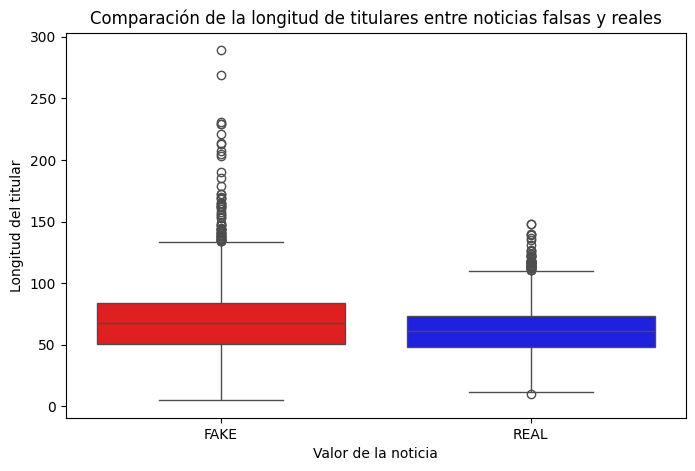

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Valores', y='longitud_titulo', data=df_concatenado, palette=['red', 'blue'])
plt.xlabel("Valor de la noticia")
plt.ylabel("Longitud del titular")
plt.title("Comparación de la longitud de titulares entre noticias falsas y reales")
plt.show()

#### Conclusión 🧡
- Las noticias falsas tienen una mayor variabilidad en la longitud de los títulos: outliers más dispersos y bigotes más alargados. Entonces: las noticias falsas varían considerablemente y algunas noticias tienen títulos muy largos.

- Las noticias reales son más consistentes en la longitud de los títulos. Tienen menos dispersión, bigotes más cortos y la caja es más estrecha.

- La diferencia entre las medianas no es enorme, entonces no hay una diferencia radical en la longitud media de los títulos entre las noticias, aunque la variabilidad es mucho mayor en las noticias falsas.

In [ ]:
#Calculo la varianza

df_fake['varianza_titulo'] = df_fake['titulo'].apply(lambda x: np.var([len(word) for word in x.split()]))
df_real['varianza_titulo'] = df_real['titulo'].apply(lambda x: np.var([len(word) for word in x.split()]))

In [ ]:
varianza_fake = df_fake['varianza_titulo'].mean()
varianza_real = df_real['varianza_titulo'].mean()

print(f"Varianza media de títulos FAKE: {varianza_fake}")
print(f"Varianza media de títulos REAL: {varianza_real}")

Varianza media de títulos FAKE: 6.6317934611116565
Varianza media de títulos REAL: 6.041639315504395


In [ ]:
df_real.sample()

,ID,Autor,autor_codificado,compartir_tiempo,fecha_compartir,hora_compartir,titulo,texto,tematica,Fuente,...,tiempo,tipo,pais,idioma,Valores,Valores_codificados,fecha_tiempo,hora_tiempo,longitud_titulo,varianza_titulo
2343,3938,Caleb Shah,6,207,2022-10-11,22:00:00,Human remains suggest explosion brought down E...,Human remains recovered from the crash site of...,Historia,The Reporter,...,768,Crítica,Kenya,English,REAL,1,2022-10-03,07:00:00,84,2.92562


In [ ]:
df_fake.sample()

,ID,Autor,autor_codificado,compartir_tiempo,fecha_compartir,hora_compartir,titulo,texto,tematica,Fuente,...,tiempo,tipo,pais,idioma,Valores,Valores_codificados,fecha_tiempo,hora_tiempo,longitud_titulo,varianza_titulo
292,5772,Isabella Nguyen,15,351,2022-10-03,01:00:00,How To Reduce Stress,Share on Facebook Share on Twitter The root ca...,Salud,The Reporter,...,411,Carta al editor,Kenya,English,FAKE,0,2022-09-18,10:00:00,20,3.1875


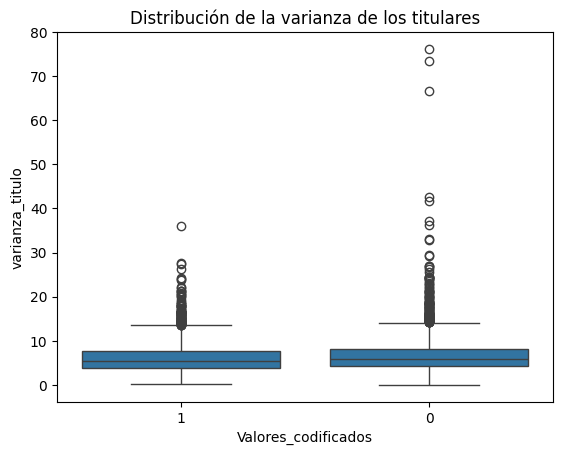

In [ ]:
df_concat = pd.concat([df_real[['titulo', 'varianza_titulo']].assign(Valores_codificados='1'),
                         df_fake[['titulo', 'varianza_titulo']].assign(Valores_codificados='0')])

sns.boxplot(x='Valores_codificados', y='varianza_titulo', data=df_concat)
plt.title("Distribución de la varianza de los titulares")
plt.show()

In [ ]:
df_concat

,titulo,varianza_titulo,Valores_codificados
0,Study: women had to drive 4 times farther afte...,3.494898,1
1,"Trump, Clinton clash in dueling DC speeches",5.061224,1
2,"As Reproductive Rights Hang In The Balance, De...",9.388889,1
3,"Despite Constant Debate, Americans' Abortion O...",1.500000,1
4,Obama Argues Against Goverment Shutdown Over P...,3.500000,1
...,...,...,...
3159,French Political Leader: “France is about to E...,8.117769,0
3160,Man with unfashionable front door feared by ne...,12.359375,0
3161,Obamacare Architect on Rising Premiums: It’s N...,9.040000,0
3162,Clinton Vs. Trump: Latest Electoral Prediction...,6.840237,0


In [ ]:
correlacion = df_concat['varianza_titulo'].corr(df_concat['Valores_codificados'])
print(f"Correlación entre la varianza de los títulos y la variable objetivo: {correlacion}")

Correlación entre la varianza de los títulos y la variable objetivo: -0.07617496946629089


#### Conclusión 💔:
- Aunque la variancia parecía ser un indicador, no hay correlación y la varianza del titular no es una característica útil para diferenciar noticias falsas de reales.

## 2. ¿Existen ciertos autores que publican más noticias FAKE que otros?

In [ ]:
df_real = pd.read_csv('df_real.csv')
df_fake = pd.read_csv('df_fake.csv')

In [ ]:
#Cuento las veces que aparece un autor en cada tabla

conteo_fake = df_fake['Autor'].value_counts()
conteo_real = df_real['Autor'].value_counts()

In [ ]:
#Creo una nueva tabla con estos valores

df_autores = pd.DataFrame({'FAKE': conteo_fake, 'REAL': conteo_real}).fillna(0)

In [ ]:
#Creo una columna en ese df para ver la proporción de noticias falsas sobre el total por autor

df_autores['% FAKE'] = (df_autores['FAKE'] / (df_autores['FAKE'] + df_autores['REAL'])) * 100

In [ ]:
#Ordeno por porcentajes de mayor a menor y muestro la tabla

df_autores = df_autores.sort_values('% FAKE', ascending=False)
df_autores.head()

,FAKE,REAL,% FAKE
Autor,,,
Chloe Nguyen,94,72,56.626506
Owen Rodriguez,104,82,55.913978
Lily Wang,91,73,55.487805
Ava Murphy,89,72,55.279503
Gabriel Santos,84,70,54.545455


<ipython-input-20-f9b210b9c944>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_autores.index, y=df_autores['% FAKE'], palette='Reds')


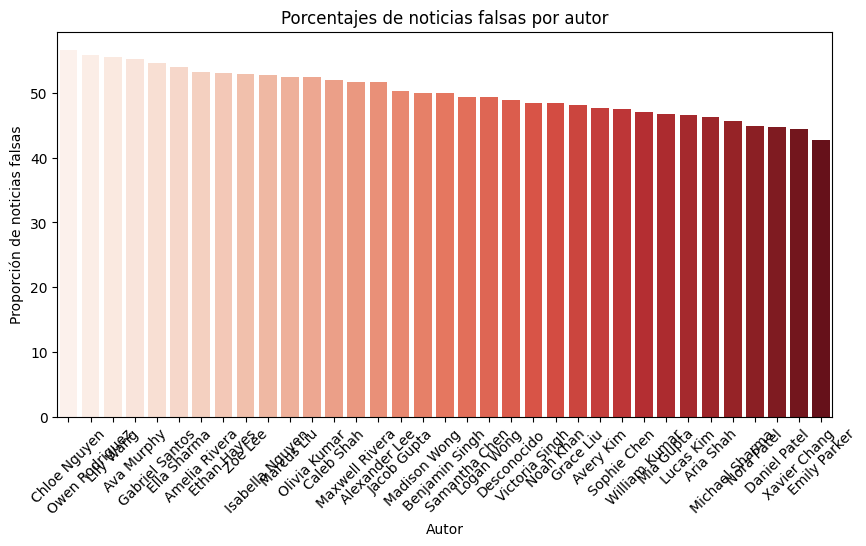

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_autores.index, y=df_autores['% FAKE'], palette='Reds')
plt.xticks(rotation=45)
plt.ylabel('Proporción de noticias falsas')
plt.title('Porcentajes de noticias falsas por autor')
plt.show()

#### Conclusión 💔:

- No parece que sea significativo, todos los autores tienen porcentajes parecidos sobre la proporción de noticias faksas que publican.

# Comportamiento temporal ⏰

## 1. ¿En qué momentos del día se publican más noticias falsas y más reales?

In [ ]:
df_real = pd.read_csv('df_real.csv')
df_fake = pd.read_csv('df_fake.csv')

In [ ]:
#'Tiempo' está representado como un número ntero, vamos a sacar una fecha más concreta cogiendo el día de referencia, que es el 1/09/2022 a las 7:00.

from datetime import datetime, timedelta
fecha_referencia = datetime(2022, 9, 1, 7, 0, 0)

#Ahora creo una columna nueva con base en la columna "tiempo" que me dará la fecha y la hora de publicación
df_fake['fecha_publicacion'] = df_fake['tiempo'].apply(lambda x: fecha_referencia + timedelta(hours=x))
df_real['fecha_publicacion'] = df_real['tiempo'].apply(lambda x: fecha_referencia + timedelta(hours=x))


In [ ]:
df_fake.sample()

,ID,Autor,autor_codificado,compartir_tiempo,fecha_compartir,hora_compartir,titulo,texto,tematica,Fuente,...,favorito,tiempo,tipo,pais,idioma,Valores,Valores_codificados,fecha_tiempo,hora_tiempo,fecha_publicacion
825,6679,Lucas Kim,19,87,2022-09-27,06:00:00,FBI Sources believe Clinton Foundation case is...,FBI Sources believe Clinton Foundation case is...,Política,Voice of the Nation,...,4774.0,536,Entrevista exclusiva,Sudan,English,FAKE,0,2022-09-23,15:00:00,2022-09-23 15:00:00


In [ ]:
#Para tener a hora del día en que se publicó la noticio creo otra columna solo para la hora de publicación:

df_fake['hora_publicacion'] = df_fake['fecha_publicacion'].dt.hour
df_real['hora_publicacion'] = df_real['fecha_publicacion'].dt.hour

In [ ]:
#Cuento la cantidad de noticias por cada hora del día

hora_fake = df_fake['hora_publicacion'].value_counts().sort_index()
hora_real = df_real['hora_publicacion'].value_counts().sort_index()


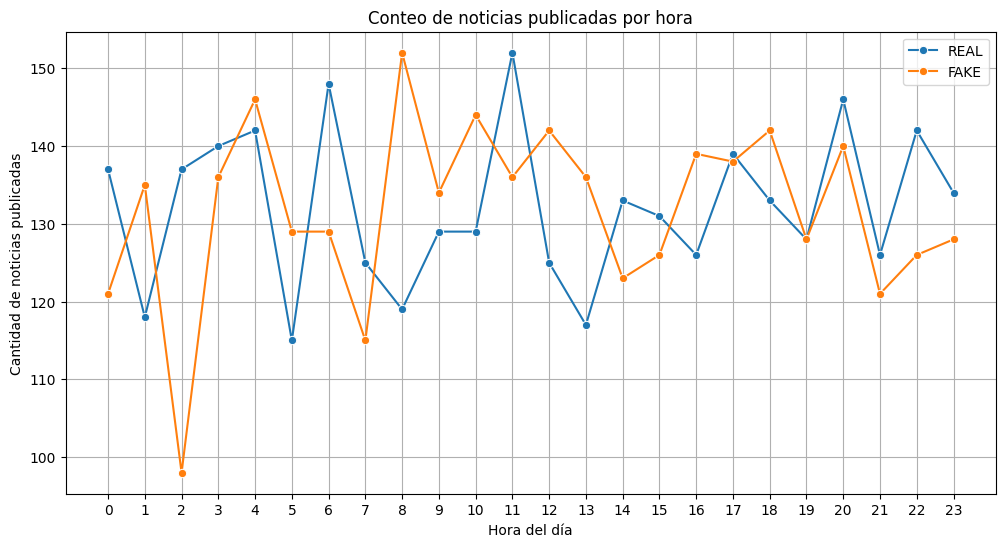

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hora_real.index, y=hora_real.values, label="REAL", marker="o")
sns.lineplot(x=hora_fake.index, y=hora_fake.values, label="FAKE", marker="o")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de noticias publicadas")
plt.title("Conteo de noticias publicadas por hora")
plt.xticks(range(0, 24))  # Asegurar que se muestren todas las horas
plt.legend()
plt.grid(True)
plt.show()

### Algunos picos destacan:

- A las 2 de la madrugada hay muchas menos noticias falsas en comparación con su distribución en otras horas.
- Sin embargo, a las 8 de la mañana se publian más noticias falsas que reales, alcanzando las noticias falsas su mayor pico.
- El pico de noticias reales publicadas se encuentra a las 11 de la mañana.
- El mínimo de noticias reales publicadas se encuentra  a las 5 de la madrugadas.

Tenemos que ver si es estadísticamente significativo:

In [ ]:
# Paso a un df el conteo de las horas para poder operar sobre las columnas 'FAKE' o 'REAL' que en este caso tienen la hora de publicación
horas_df = pd.DataFrame({'FAKE': hora_fake, 'REAL': hora_real}).fillna(0)

# Calculo el porcentaje de noticias FAKE y REAL en cada hora
horas_df['% FAKE'] = (horas_df['FAKE'] / (horas_df['FAKE'] + horas_df['REAL'])) * 100
horas_df['% REAL'] = (horas_df['REAL'] / (horas_df['FAKE'] + horas_df['REAL'])) * 100

# Muestro las horas donde FAKE supera a REAL en más de un umbral (para hacerlo más relevante, pondremos un 60%)
print(horas_df[horas_df['% FAKE'] > 60])

#Vemos que no hay ninguna hora en la que un 60% de las noticias sean falsas.

Empty DataFrame
Columns: [FAKE, REAL, % FAKE, % REAL]
Index: []


#### Conclusión💔:
- aunque hay picos, no resulta estadístiacamente significativo.

## 2. ¿Hay diferencias en la duración de lectura de las noticias reales vs falsas? (columna 'duracion')

In [ ]:
df_real = pd.read_csv('df_real.csv')
df_fake = pd.read_csv('df_fake.csv')

In [ ]:
#La columna 'duracion' contiene datos negativos, así que vamos a sacarlos porque no deberían estar (la duración en la que tardas en leer un noticia no puede ser negativa):

df_fake = df_fake[df_fake['duracion'] >= 0]
df_real = df_real[df_real['duracion'] >= 0]


In [ ]:
stats_fake = df_fake['duracion'].describe()
stats_real = df_real['duracion'].describe()

print("Estadísticas de duración de noticias FAKE:\n", stats_fake)
print("\nEstadísticas de duración de noticias REAL:\n", stats_real)

Estadísticas de duración de noticias FAKE:
 count    2813.000000
mean      282.316744
std       165.881529
min         0.000000
25%       155.000000
50%       268.000000
75%       395.000000
max       940.000000
Name: duracion, dtype: float64

Estadísticas de duración de noticias REAL:
 count    2829.000000
mean      282.472252
std       162.272466
min         0.000000
25%       161.000000
50%       265.000000
75%       389.000000
max       961.000000
Name: duracion, dtype: float64


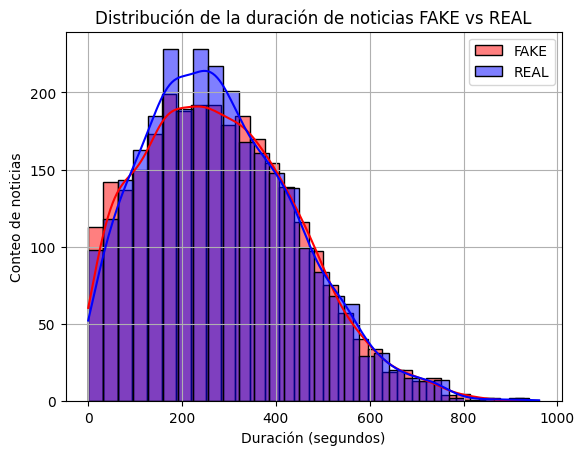

In [ ]:
sns.histplot(df_fake['duracion'], color='red', label='FAKE', kde=True, bins=30, alpha=0.5)
sns.histplot(df_real['duracion'], color='blue', label='REAL', kde=True, bins=30, alpha=0.5)

plt.xlabel("Duración (segundos)")
plt.ylabel("Conteo de noticias")
plt.title("Distribución de la duración de noticias FAKE vs REAL")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Prueba t para comparar las medias
t_stat, p_value = ttest_ind(df_fake['duracion'], df_real['duracion'], equal_var=False)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("La diferencia en la duración de noticias FAKE vs REAL es significativa.")
else:
    print("No hay suficiente evidencia para decir que las noticias FAKE y REAL tienen diferentes duraciones.")

Estadístico t: -0.03559180363056903
Valor p: 0.971609104453672
No hay suficiente evidencia para decir que las noticias FAKE y REAL tienen diferentes duraciones.


#### Conclusión💔:
- No influye la duración de la noticia

## 3. ¿Las noticias FAKE suelen compartirse más rápido o más veces que las reales?

In [ ]:
df_unido = pd.read_csv('df_unido.csv')
df_real = pd.read_csv('df_real.csv')
df_fake = pd.read_csv('df_fake.csv')



In [ ]:
#¿Qué tipo de noticias se comparten más?

real_media = df_real['compartir'].mean()
fake_media = df_fake['compartir'].mean()

print(f"Promedio de comparticiones en noticias reales: {real_media:.2f}")
print(f"Promedio de comparticiones en noticias falsas: {fake_media:.2f}")

Promedio de comparticiones en noticias reales: 50476.16
Promedio de comparticiones en noticias falsas: 49920.57


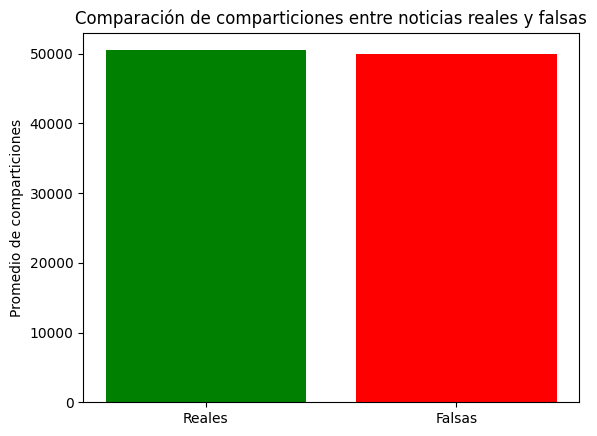

In [ ]:
import matplotlib.pyplot as plt

medias = [real_media, fake_media]
tipos = ['Reales', 'Falsas']

plt.bar(tipos, medias, color=['green', 'red'])
plt.ylabel('Promedio de comparticiones')
plt.title('Comparación de comparticiones entre noticias reales y falsas')
plt.show()

### Conclusión 💔:
En promedio, la viralidad de noticias reales y falsas es similar, aunque las noticias reales un poco más.

<ipython-input-36-628f3b46fa4d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_real['compartir_tiempo'], label='Real', shade=True)
<ipython-input-36-628f3b46fa4d>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_fake['compartir_tiempo'], label='Fake', shade=True)


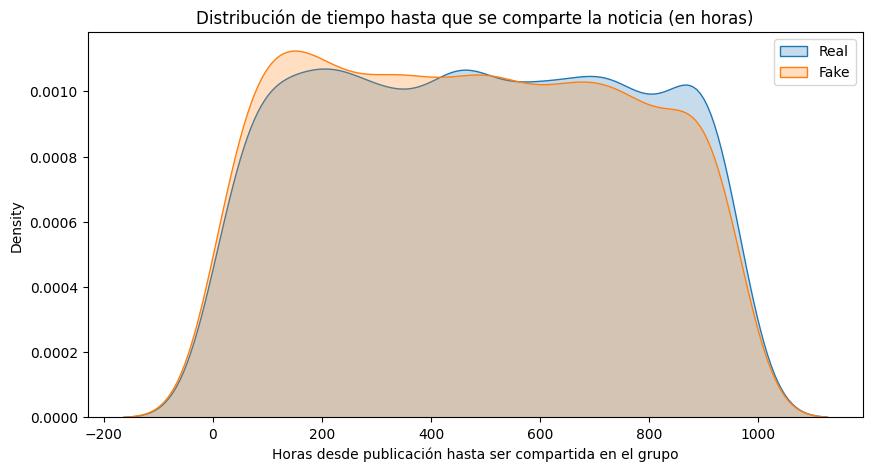

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.kdeplot(df_real['compartir_tiempo'], label='Real', shade=True)
sns.kdeplot(df_fake['compartir_tiempo'], label='Fake', shade=True)
plt.title('Distribución de tiempo hasta que se comparte la noticia (en horas)')
plt.xlabel('Horas desde publicación hasta ser compartida en el grupo')
plt.legend()
plt.show()

In [ ]:
print("Tiempo medio de compartición (en horas):")
print(f"Fake: {df_fake['compartir_tiempo'].mean():.2f}")
print(f"Real: {df_real['compartir_tiempo'].mean():.2f}")

print("\nMediana:")
print(f"Fake: {df_fake['compartir_tiempo'].median():.2f}")
print(f"Real: {df_real['compartir_tiempo'].median():.2f}")

Tiempo medio de compartición (en horas):
Fake: 473.56
Real: 487.77

Mediana:
Fake: 469.00
Real: 483.00


In [ ]:
limite_horas = 2
porcentaje_fake_rapido = (df_fake['compartir_tiempo'] <= limite_horas).mean() * 100
porcentaje_real_rapido = (df_real['compartir_tiempo'] <= limite_horas).mean() * 100

print(f"Porcentaje de noticias FAKE compartidas en ≤ {limite_horas}h: {porcentaje_fake_rapido:.2f}%")
print(f"Porcentaje de noticias REAL compartidas en ≤ {limite_horas}h: {porcentaje_real_rapido:.2f}%")

Porcentaje de noticias FAKE compartidas en ≤ 2h: 0.16%
Porcentaje de noticias REAL compartidas en ≤ 2h: 0.09%


### Conclusión 💔:

Las noticias falsas parece que se comparten ligeramente más rápido que las noticias reales. Aun así, no tiene una gran diferencia.

# Engagement y métricas de interacción ⚡

## 1. ¿Las noticias FAKE tienen más o menos visitas que las reales?

In [ ]:
df_unido.groupby('Valores')['visitas'].describe()

,count,mean,std,min,25%,50%,75%,max
Valores,,,,,,,,
FAKE,3159.0,501980.663185,289565.207399,309.0,252286.0,504057.0,754646.5,999864.0
REAL,3167.0,504156.941269,291948.335000,184.0,246955.5,512273.0,756605.5,999300.0


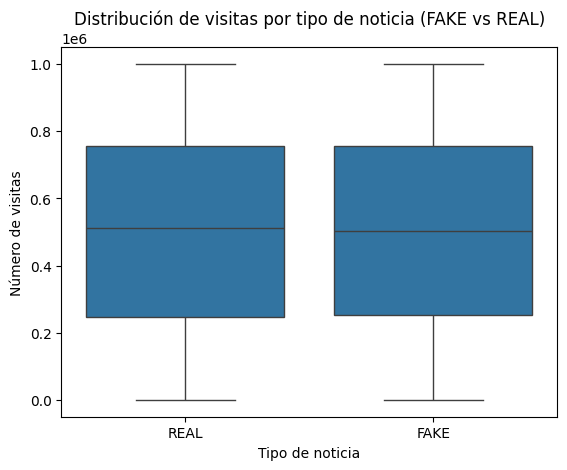

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Valores', y='visitas', data=df_unido)
plt.title('Distribución de visitas por tipo de noticia (FAKE vs REAL)')
plt.xlabel('Tipo de noticia')
plt.ylabel('Número de visitas')
plt.show()

### Conclusión 💔:

No parece haber diferencia significativa entre las visualizaciones que reciben ambos tipos de noticias, a pesar de que las noticias falsas, de media, reciban un poco menos de visitas.

## 2. ¿Se guardan más las noticias reales como favoritas o las falsas?

In [ ]:
df_unido.groupby('Valores')['favorito'].describe()

,count,mean,std,min,25%,50%,75%,max
Valores,,,,,,,,
FAKE,2994.0,4976.555444,2886.991339,5.0,2444.75,4926.0,7403.5,9997.0
REAL,2981.0,5023.366320,2890.711559,1.0,2581.00,5037.0,7515.0,9998.0


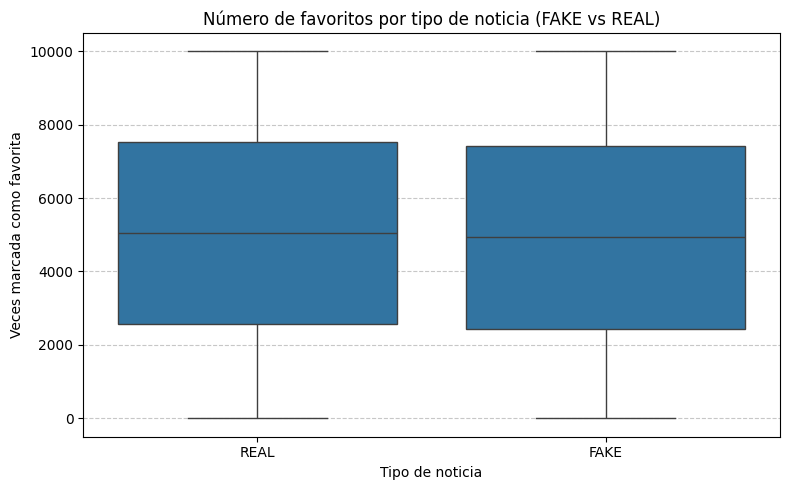

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Valores', y='favorito', data=df_unido)
plt.title('Número de favoritos por tipo de noticia (FAKE vs REAL)')
plt.xlabel('Tipo de noticia')
plt.ylabel('Veces marcada como favorita')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Conclusión 💔:

Apenas hay diferencia entre ambos tipos de valores.

## 3. ¿Hay una relación entre el número de visitas y la cantidad de veces que se comparte una noticia?

In [ ]:
df_fake = pd.read_csv("df_fake.csv")
df_real = pd.read_csv("df_real.csv")
df_unido = pd.read_csv("df_unido.csv")

In [ ]:
corr = df_unido[['visitas', 'compartir','Valores_codificados']].corr(method='pearson')
print(corr)

                      visitas  compartir  Valores_codificados
visitas              1.000000   0.002447             0.003743
compartir            0.002447   1.000000             0.009592
Valores_codificados  0.003743   0.009592             1.000000


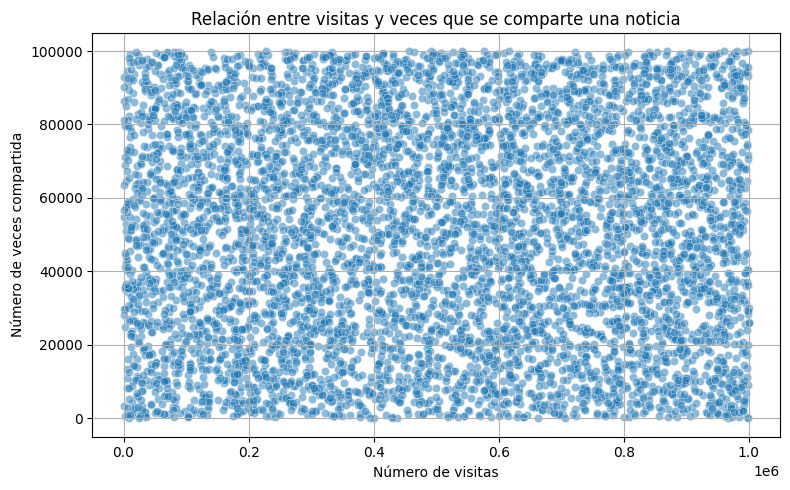

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_unido, x='visitas', y='compartir', alpha=0.5)
plt.title('Relación entre visitas y veces que se comparte una noticia')
plt.xlabel('Número de visitas')
plt.ylabel('Número de veces compartida')
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusión 💔:

No se muestra correlación entre los valores 'visitas', 'compartir','Valores_codificados' y, además, visualmente no se aprecia ninguna relación entre las visitas que recibe una noticia y entre las veces que se comaprte.

## 4. ¿Ciertas fuentes publican más noticias falsas que otras?


Primero mostramos los valores unicos del campo fuente.

In [ ]:
df_fake = pd.read_csv("df_fake.csv")
df_real = pd.read_csv("df_real.csv")
df_unido = pd.read_csv("df_unido.csv")

In [ ]:
df_real['Fuente'].unique()

array(['The Insight', 'Central Times', 'National Courier',
       'The Herald Tribune', 'Capital Gazette', 'Daily Digest',
       'The Informer', 'Voice of the Nation', 'Times Today',
       'Star Sentinel', 'Press Pulse', 'Insider Insights', 'The Observer',
       'Daily Beacon', 'Global Gazette', 'Global Insight',
       'The Daily Dispatch', 'Evening Echo', 'Express Tribune',
       'The Chronicle', 'Sunrise Chronicle', 'City Beat', 'Echo News',
       'City Times', 'The Reporter', 'Frontline Times', 'Urban News',
       'Newsline', 'World News Network', 'The Pulse', 'Newsflash',
       'Morning Star', 'Metro News'], dtype=object)

Concatenamos los dos Dfs

In [ ]:
df_fuentes_fake_real=pd.concat([df_fake[['Fuente', 'Valores']], df_real[['Fuente', 'Valores']]])

Preparamos el Df para poder pintalo correctamente. Queremos que nos muestre el porcentaje de noticias Fake que publica cada fuente


In [ ]:
df_fuentes_fake_real['fake']=df_fuentes_fake_real['Valores'].apply(lambda x: 1 if (x=="FAKE") else 0)
df_fuentes_fake_real['real']=df_fuentes_fake_real['Valores'].apply(lambda x: 1 if (x=="REAL") else 0)


df_comparativo_real_fake = df_fuentes_fake_real.groupby('Fuente')[['fake','real']].agg('sum').reset_index()
df_comparativo_real_fake['total'] = df_comparativo_real_fake['fake'] + df_comparativo_real_fake['real']
df_comparativo_real_fake['porcentaje_fake'] = round(df_comparativo_real_fake['fake'] / df_comparativo_real_fake['total']*100,2)


df_comparativo_real_fake=df_comparativo_real_fake.sort_values(by='porcentaje_fake',ascending=False)

In [ ]:
df_comparativo_real_fake

,Fuente,fake,real,total,porcentaje_fake
9,Frontline Times,102,74,176,57.95
6,Echo News,105,78,183,57.38
31,Voice of the Nation,112,84,196,57.14
17,Newsline,95,77,172,55.23
16,Newsflash,106,86,192,55.21
11,Global Insight,99,85,184,53.80
8,Express Tribune,92,80,172,53.49
10,Global Gazette,97,87,184,52.72
12,Insider Insights,94,85,179,52.51
4,Daily Beacon,96,87,183,52.46


Ahora visualizamos nuestro grafico en el que podemos ver el porcentaje de noticias Fake que publica cada fuente e indicamos con una linea la media de porcentaje de noticias Fake de todos las fuentes.

In [ ]:
df = px.data.tips()
fig = px.histogram(df_comparativo_real_fake, x="Fuente", y="porcentaje_fake", barmode='group',
             height=400)

fig.update_layout(
    plot_bgcolor="lightgray",
    paper_bgcolor="white",
    font=dict(family="Arial", size=15, color="black"),
    title="Porcentaje de noticias FAKE publicada por cada fuente",
    title_x=0.5,
    xaxis_title="Fuentes",
    yaxis_title="% noticias fake"
)



fig.update_traces(marker_color="red")


fig.add_shape(
    type="line",
    x0=-1, x1=2,
    y0=df_comparativo_real_fake["porcentaje_fake"].mean(),
    y1=df_comparativo_real_fake["porcentaje_fake"].mean(),
    xref="paper", yref="y",
    line=dict(color="black", width=5,dash='dot')
)


fig.show()

#### Conclusión💔:
Más del 57% de las noticias de las fuentes: 'Frontline Times','Echo News' y 'Voice of the Nation' son Fake.

Por el contrario vemos que de las fuentes: 'City Beat',	'Star Sentinel' y 'World News Network' poco mas del 43% de sus noticias son fake

#Correlaciones y relaciones entre variables 🥇

##1. ¿Existe una correlación entre la cantidad de veces que una noticia es compartida y su veracidad?

In [ ]:
df_fake = pd.read_csv("df_fake.csv")
df_real = pd.read_csv("df_real.csv")
df_unido = pd.read_csv("df_unido.csv")

In [ ]:
corr = df_unido[['compartir','Valores_codificados']].corr(method='pearson')
print(corr)

                     compartir  Valores_codificados
compartir             1.000000             0.009592
Valores_codificados   0.009592             1.000000


<ipython-input-54-200c7eb73ae2>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




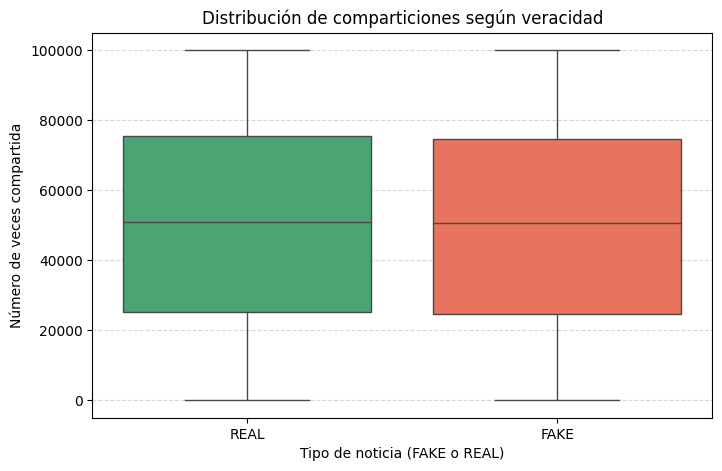

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='Valores', y='compartir', data=df_unido, palette={'FAKE': 'tomato', 'REAL': 'mediumseagreen'})
plt.title('Distribución de comparticiones según veracidad')
plt.xlabel('Tipo de noticia (FAKE o REAL)')
plt.ylabel('Número de veces compartida')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

### Conclusión 💔:

No se muestra correlación estadística entre las comparticiones de una noticia y su veracidad.

##2. ¿Hay una relación entre el tiempo de lectura y si una noticia es falsa o real?

In [ ]:
df_fake = pd.read_csv("df_fake.csv")
df_real = pd.read_csv("df_real.csv")
df_unido = pd.read_csv("df_unido.csv")

<ipython-input-56-a4bcb7eab715>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




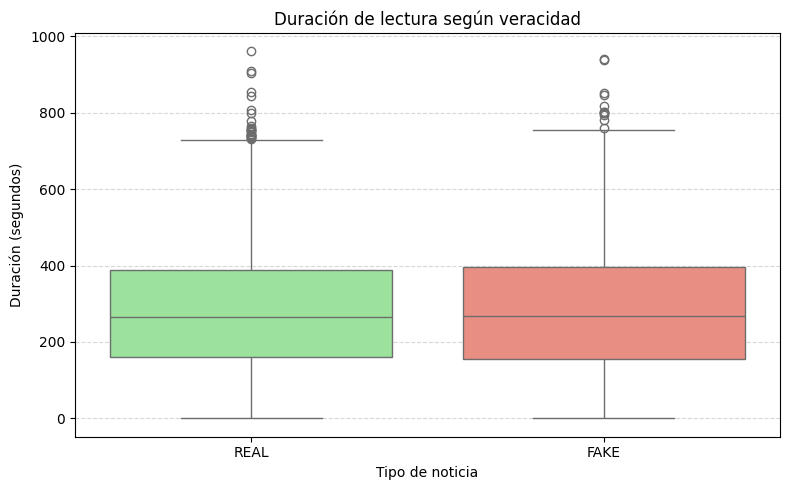

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='Valores', y='duracion', data=df_unido, palette={'FAKE': 'salmon', 'REAL': 'lightgreen'})
plt.title('Duración de lectura según veracidad')
plt.xlabel('Tipo de noticia')
plt.ylabel('Duración (segundos)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
corr = df_unido[['duracion','Valores_codificados']].corr(method='pearson')
print(corr)

                     duracion  Valores_codificados
duracion             1.000000             0.000474
Valores_codificados  0.000474             1.000000


### Conclusión💔:
Probablemente no hay correlación ya que el resultado es 0 por el contrario sí fuera cercano a 1 o a -1 si tendría relación.

##3. ¿Ciertas categorías de noticias (temática/tipo) tienen más probabilidades de ser FAKE?

In [ ]:
df_fake = pd.read_csv("df_fake.csv")
df_real = pd.read_csv("df_real.csv")
df_unido = pd.read_csv("df_unido.csv")


In [ ]:
# Tabla cruzada de conteo
conteo = pd.crosstab(df_unido['tematica'], df_unido['Valores'])

# Tabla cruzada de proporciones (% de FAKE en cada categoría)
proporcion_fake = conteo.apply(lambda row: row['FAKE'] / row.sum(), axis=1)

# Mostramos las temáticas con más proporción de FAKE
print(proporcion_fake.sort_values(ascending=False))

tematica
Arte              1.000000
Religión          1.000000
No clasificado    0.960000
Deportes          0.913043
Ciencia           0.896552
Salud             0.788288
Tecnología        0.778761
Historia          0.707071
Economía          0.647887
Sociedad          0.632302
Educación         0.500000
Política          0.431649
dtype: float64


<ipython-input-60-9986e7a41e34>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




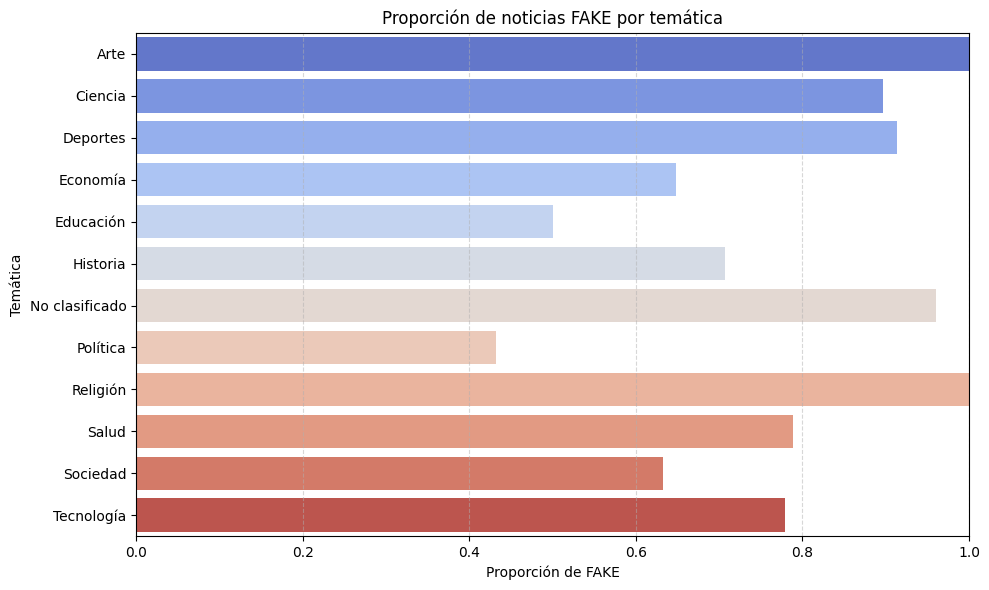

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con las proporciones
proporcion_df = proporcion_fake.reset_index()
proporcion_df.columns = ['tematica', 'proporcion_fake']

# Ordenar y graficar
plt.figure(figsize=(10,6))
sns.barplot(data=proporcion_df, x='proporcion_fake', y='tematica', palette='coolwarm')
plt.title('Proporción de noticias FAKE por temática')
plt.xlabel('Proporción de FAKE')
plt.ylabel('Temática')
plt.xlim(0,1)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Conclusión 🧡

- El 100% de las noticias de temática "Arte" en tu dataset son FAKE.

- También, todas las noticias clasificadas como "Religión" son FAKE.

- Solo el 43% de las noticias políticas son FAKE. La mayoría en este caso serían reales.

- La mitad de las noticias sobre educación son falsas, la otra mitad reales.

In [ ]:
# Tabla cruzada de conteo
conteo = pd.crosstab(df_unido['tipo'], df_unido['Valores'])

# Tabla cruzada de proporciones (% de FAKE en cada categoría)
proporcion_fake = conteo.apply(lambda row: row['FAKE'] / row.sum(), axis=1)

# Mostramos las temáticas con más proporción de FAKE
print(proporcion_fake.sort_values(ascending=False))

tipo
Noticia de última hora       0.897216
Crítica                      0.436567
Columna de humor             0.419492
Opinión del lector           0.418719
Artículo de opinión          0.417040
Entrevista en profundidad    0.407895
Artículo de investigación    0.402597
Carta al editor              0.390756
Entrevista                   0.388393
Reportaje especial           0.387097
Entrevista exclusiva         0.383260
Noticia internacional        0.377119
Reportaje                    0.365462
Noticia local                0.364532
Entrevista a fondo           0.354839
Crónica                      0.354331
Noticia destacada            0.344538
Reseña                       0.337662
Editorial                    0.336283
Columna                      0.330317
Análisis                     0.321586
dtype: float64


<ipython-input-62-f637190accaa>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




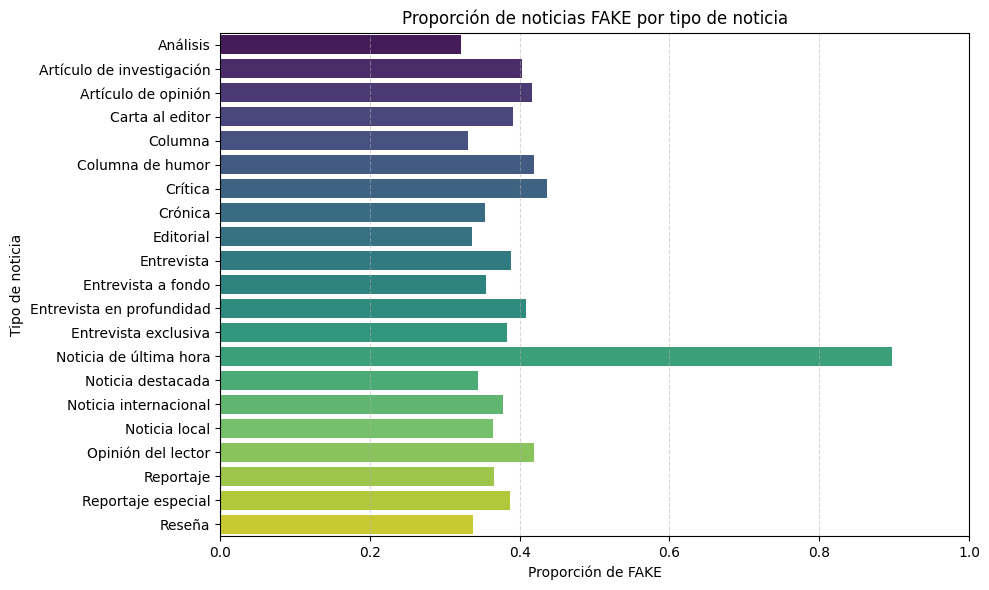

In [ ]:
# Crear un DataFrame con las proporciones
proporcion_df = proporcion_fake.reset_index()
proporcion_df.columns = ['tipo', 'proporcion_fake']

# Ordenar y graficar
plt.figure(figsize=(10,6))
sns.barplot(data=proporcion_df, x='proporcion_fake', y='tipo', palette='viridis')
plt.title('Proporción de noticias FAKE por tipo de noticia')
plt.xlabel('Proporción de FAKE')
plt.ylabel('Tipo de noticia')
plt.xlim(0,1)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Conclusión 🧡:

- Una proporción altísima de las noticias de última hora (casi 9 de cada 10 noticias) son falsas.

- Tipos como "Crítica", "Columna de humor", "Opinión del lector" están en torno al 41-43% FAKE, lo cual es bastante equilibrado.

- "Análisis", "Columna", "Editorial", "Reseña" están entre el 32–34% FAKE, lo que indica que tienden a ser mayormente reales.

# Patrones geográficos 🪐

In [ ]:
df_fake = pd.read_csv("df_fake.csv")
df_real = pd.read_csv("df_real.csv")
df_unido = pd.read_csv("df_unido.csv")

In [ ]:
grouped = df_unido.groupby(['pais', 'Valores_codificados']).size().unstack(fill_value=0)

grouped = grouped.sort_values(by=1, ascending=False)

print("Distribución ordenada de noticias reales y falsas por país:")
print(grouped)

proporciones = grouped.div(grouped.sum(axis=1), axis=0)

proporciones = proporciones.sort_values(by=1, ascending=False)

print("\nProporciones ordenadas de noticias reales y falsas por país:")
print(proporciones)


Distribución ordenada de noticias reales y falsas por país:
Valores_codificados    0    1
pais                         
Ukraine               86  104
Philippines           85  104
Sudan                 86  103
South Africa          79  102
Kenya                 93  102
Myanmar              115  101
Brazil                91  100
Mexico                86   99
United Kingdom       104   97
South Korea           82   96
Bangladesh            96   95
Tanzania              80   94
Algeria               78   94
Iran                  82   93
Thailand              97   91
Uganda                92   91
India                102   91
Nigeria               78   89
Japan                 91   89
Turkey                93   89
France                84   88
United States        104   87
Italy                 91   86
Vietnam               97   85
Russia                93   85
Spain                 97   84
Argentina             93   83
Ethiopia              80   83
Colombia              99   83
DR Congo  

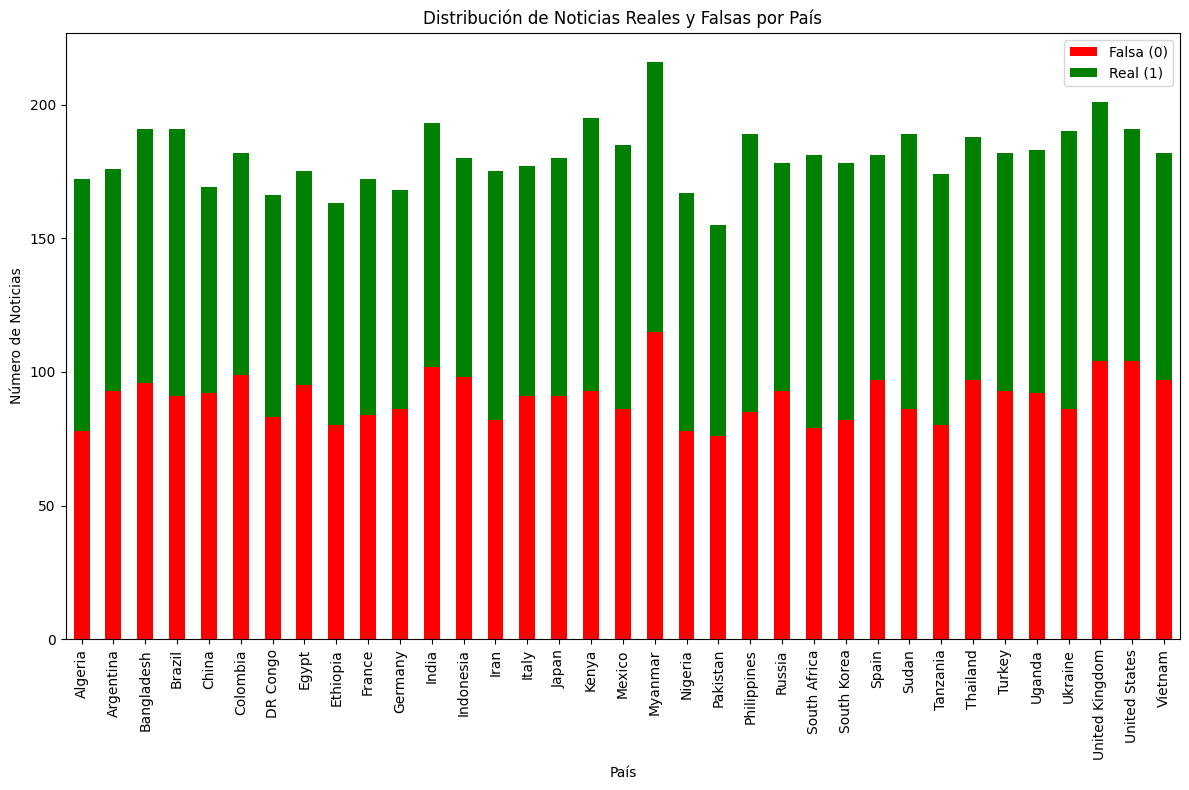

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_pais = df_unido.groupby(['pais', 'Valores_codificados']).size().unstack(fill_value=0)

df_pais.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'green'])

plt.title('Distribución de Noticias Reales y Falsas por País')
plt.xlabel('País')
plt.ylabel('Número de Noticias')
plt.xticks(rotation=90)  # Rota los nombres de los países para mejor legibilidad
plt.legend(['Falsa (0)', 'Real (1)'])
plt.tight_layout()

plt.show()


### Conclusión 💔:

No parece haber relación entre el país y la veracidad de una noticia.